### HW 6
---

**Andrew Pickner**

**I worked by myself on this assignment.**
   
---

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### 1: Find and plot the roots of $f_1$ and $f_2$

$f_1(x_1, x_2) = x_1^3-x_2^3+x_1$

$f_2(x_1, x_2) = x_1^2-x_2^2+1$

Find all points $r_1$ and $r_2$ such that $f_1(r_1, r_2)=0$ and $f_2(r_1, r_2)=0$.

Plot all points $r_1$ and $r_2$.

---

[https://matplotlib.org/tutorials/intermediate/legend_guide.html](https://matplotlib.org/tutorials/intermediate/legend_guide.html)

[https://moonbooks.org/Articles/How-to-plot-a-circle-in-python-using-matplotlib-/](https://moonbooks.org/Articles/How-to-plot-a-circle-in-python-using-matplotlib-/)

[https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.contour.html](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.contour.html)



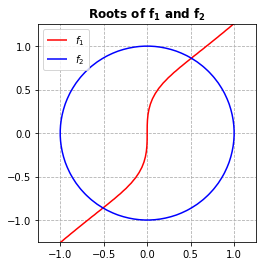

In [2]:
# f_1 = lambda x, y: (x ** 3) - (y ** 3) + x
# f_2 = lambda x, y: (x ** 2) + (y ** 2) - 1

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x,y)

F = X**3 - Y**3 + X
F2 = X**2 + Y**2 - 1.0

fig, ax = plt.subplots()

CS1 = ax.contour(X,Y,F,[0], colors=['red'])
CS2 = ax.contour(X,Y,F2,[0], colors=['blue'])

ax.set_aspect(1)


plt.title('$\\bf{Roots\ of\ f_1\ and\ f_2}$', fontsize=12)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle='--')

# adding labels to the contour graph was surprisingly obnoxious
labels = ['$f_1$', '$f_2$']
for i in range(len(labels)):
    if i == 0:
        CS1.collections[i].set_label(labels[i])
    else:
        CS2.collections[0].set_label(labels[i])
plt.legend(loc='upper left')

plt.show()

---

### 2: By hand calculate the Jacobian matrix of the system $(f_1, f_2)$

[https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant)

We get:

$J_f(x_1, x_2)=
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} \\
\end{bmatrix} = 
\begin{bmatrix}
3x_1^2+1 & -3x_2^2 \\
2x_1 & -2x_2 \\
\end{bmatrix}$

---

### 3: Use Newton's method for systems to find the solution to the given equations $f_1=0$ and $f_2=0$

[http://hplgit.github.io/Programming-for-Computations/pub/p4c/._p4c-solarized-Python031.html](http://hplgit.github.io/Programming-for-Computations/pub/p4c/._p4c-solarized-Python031.html)

---

In [3]:
def Newton_system(F, J, x, eps):
    """
    Solve nonlinear system F=0 by Newton's method.
    J is the Jacobian of F. Both F and J must be functions of x.
    At input, x holds the start value. The iteration continues
    until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 100:
        delta = np.linalg.solve(J(x), -F_value)
        x = x + delta
        print(x)
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=3)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [4]:
def F(x):
    return np.array(
        [x[0]**3 - x[1]**3 + x[0],
         x[0]**2 + x[1]**3 -1])

def J(x):
    return np.array(
        [[((3 * (x[0]**2)) + 1), (-(3 * x[1]**2))],
         [(2 * x[0]), (-2 * x[1])]])

In [10]:
tol = 1e-8

init_x = -0.5
init_y = -0.5
step_size = 0.1
num_iterations = 10

for i in range(num_iterations):
    init_x += step_size
    init_y = -1
    for ii in range(num_iterations):
        init_y += step_size
        Newton_system(F, J, [init_x, init_y], tol)

[4.232875   2.03072222]
[4.41725276 8.6422827 ]
[-162.20745255  -38.10756898]
[-64.9733209 756.6591233]
[3072794.37601031   23163.58320766]
[2.06778069e+06 3.38790306e+08]
[-9.46056910e+18 -3.52422788e+14]
[7.98731136e+19 6.21031820e+28]
[-1.49937736e+66 -2.48018726e+48]
[-9.99576490e+65  3.07566441e+96]
[            inf 1.53718092e+162]
[2.62769231 1.55884615]
[3.23039973 5.68376393]
[-75.47307705 -22.06518274]
[-26.99194599 258.14507197]
[289213.0947736    3335.71683747]
[ 194120.05578546 9859755.97018176]
[-2.51845305e+15 -9.76201380e+11]
[6.99398811e+16 4.76668250e+23]
[-7.74272537e+53 -1.66690628e+40]
[-4.51790416e+53  1.38928828e+80]
[2.96763239e+186 3.13833564e+133]
[1.72992188 1.36209821]
[3.39881922 5.14077958]
[-69.51644661 -28.82693817]
[ 64.68775056 626.50153874]
[-2121796.04889697   -22205.15914259]
[-1.39098506e+06  2.14971141e+08]
[3.54802728e+18 1.48549766e+14]
[2.17074118e+19 1.10339926e+28]
[-3.09428296e+64 -1.19759711e+47]
[-2.06284457e+64  7.17119416e+93]
[         

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.



[ 0.01076732 -2.64822835]
[54.49546086  0.82558485]
[ 36.46586775 609.03441332]
[-3298397.63788085   -11421.79148184]
[ -2200057.1637142  -93860246.47130914]
[-1.92434106e+17 -1.05727230e+14]
[1.68794772e+21 5.59219599e+27]
[-5.18034038e+61 -4.71966866e+48]
[9.24484115e+70 1.11376361e+97]
[            -inf -5.14828384e+167]
[0.53855634 0.44957746]
[-0.35444941 -1.30869163]
[-291.25927095  -78.90770363]
[  98.5508616  3935.61553781]
[-3.17274378e+08 -1.96326976e+05]
[-2.11541610e+08 -6.62242897e+10]
[-6.88677071e+23 -7.02704309e+18]
[2.57013587e+27 2.46899192e+37]
[-2.92801252e+84 -3.17282235e+64]
[5.91007273e+088 5.03340083e+128]
[ nan -inf]
[0.45176471 0.75411765]
[-0.44670789 -0.02748674]
[-0.08249521 20.45268373]
[44556.92891931    49.86533001]
[  29712.94105407 6644334.40021294]
[-4.95821481e+15 -9.91503510e+10]
[-3.30352742e+15  4.87416925e+21]
[1.75264360e+49 8.05097042e+36]
[1.85230246e+49 3.24090624e+73]
[-9.18877255e+170 -3.00156930e+122]
[0.36088462 1.23774359]
[67.35182542 

[-24912709.25562751  -1015428.72960256]
[8.76105316e+08 5.37346867e+11]
[-8.86924224e+25 -2.35770630e+20]
[1.96347862e+29 2.77939689e+40]
[-5.46758479e+91 -2.72864319e+69]
[9.23538980e+093 3.72274682e+138]
[ nan -inf]
[0.4146383  0.72420213]
[-0.54977075 -0.13744652]
[-0.03923164  4.45236646]
[438.97473379  10.38369008]
[ 294.45469575 3233.52045362]
[-63173274.17448526   -521712.65609517]
[-3.28441879e+07  1.35939251e+11]
[3.82332470e+25 2.23186801e+18]
[2.54973188e+25 2.49072671e+36]
[-3.03007740e+83 -3.17534265e+61]
[-2.01999623e+083  5.04140046e+122]
[nan nan]
[0.36256818 1.22405303]
[51.1327403  16.65670118]
[ 60.89626062 263.805226  ]
[-196453.13676481  -10295.46825775]
[2.08187284e+04 5.52596025e+07]
[-4.05417722e+18 -5.75397288e+11]
[-2.70278490e+18 -4.59533044e+24]
[-1.79518418e+55 -6.21009852e+42]
[2.30751050e+60 1.92826618e+85]
[            -inf -2.22474724e+145]
[0.30214634 2.18963415]
[-58.30680819  -3.70803468]
[ -39.50211022 -159.42614996]
[-67921.13329806  -4275.46538498

---

Honestly, I couldn't figure out the issue with Newton's method for systems... 